# Everything is prepared, don't change anything in the functions , if it is necessary contact me please
## you have only to use our dataset wwith cleaning it..etc
## then generate some queries that correspond to our dataset, but they must not exist in the data(only the semantic should exist)
## each query should have 6 expected values in an ordered way
### if anything is not clear I am always available to help

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 2.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
# from sklearn.feature_extraction.text import TfidfVectorizer
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.stem import WordNetLemmatizer
import re
import torch
import torch.nn.functional as F
from sentence_transformers import models as sentence_models
from transformers import BertTokenizer

In [ ]:
# movie_plots = { #id must be a number
#     "1": "A group of astronauts travel to Mars and encounter strange life forms.",
#     "2": "A robot detective investigates a murder in a futuristic city.",
#     "3": "A teenage girl discovers she has superpowers and fights evil.",
#     "4": "A group of friends goes on a camping trip and gets lost in the woods.",
#     "5": "A historical drama about a king and his court.",
#     "6": "Astronauts try to reach the moon, but it disappeared.",
#     "7": "Smart machine can mimic the human being",
#     "8": "The biggest Empire",
#     "9": "A man finds a mysterious portal to another dimension in his backyard.",
#     "10": "A team of scientists embarks on a journey to explore the deepest parts of the ocean.",
#     "11": "A young woman inherits a magical amulet and must protect it from dark forces.",
#     "12": "An alien race comes to Earth seeking refuge from their dying planet.",
#     "13": "A time-traveling adventure to stop a catastrophic event from reshaping history.",
#     "14": "A group of survivors must navigate a post-apocalyptic world overrun by zombies.",
#     "15": "A reclusive billionaire builds a high-tech suit to fight crime as a vigilante.",
#     "16": "A family road trip takes a wild turn when they encounter a mythical creature.",
#     "17": "A journalist uncovers a government conspiracy that threatens the freedom of society.",
#     "18": "A musical journey through the life and struggles of a legendary rock star.",
#     "19": "A team of explorers discovers a hidden civilization deep within the Amazon rainforest.",
#     "20": "A comedy of errors ensues when a case of mistaken identity leads to chaos."
# }


models

In [ ]:
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')


In [ ]:
# stop_words = set(stopwords.words('english'))
# lemmatizer = WordNetLemmatizer()

In [ ]:
BERT = SentenceTransformer('bert-base-nli-mean-tokens')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
roBERTa_sstsb = SentenceTransformer('roberta-base-nli-stsb-mean-tokens')


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/688 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/334 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
DistilBERT = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.05k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/555 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
roBERTa = SentenceTransformer('roberta-base-nli-mean-tokens')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.01k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/683 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/329 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
nsmarco = SentenceTransformer('msmarco-distilbert-base-dot-prod-v3')


In [ ]:
MiniLm = SentenceTransformer('all-MiniLm-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
mpnet = SentenceTransformer('all-mpnet-base-v2')


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
paraphrase = SentenceTransformer('paraphrase-distilroberta-base-v1')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.78k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/movies_SearchEngine/movies_dataset.csv')
# df = pd.read_csv('movies_dataset.csv')
movie_plots = {}
for idx, row in df.iterrows():
    plot_id = str(idx + 1)  # IDs start from 1
    plot_text = row['Title'] + " " + row['Plot']
    movie_plots[plot_id] = plot_text
    if(idx == 100):
      break

In [ ]:
for idx, (plot_id, plot_text) in enumerate(movie_plots.items()):
    print(f"Movie ID: {plot_id}, Plot: {plot_text}")
    if idx == 21:
        break

Movie ID: 1, Plot: Kansas Saloon Smashers A bartender is working at a saloon, serving drinks to customers. After he fills a stereotypically Irish man's bucket with beer, Carrie Nation and her followers burst inside. They assault the Irish man, pulling his hat over his eyes and then dumping the beer over his head. The group then begin wrecking the bar, smashing the fixtures, mirrors, and breaking the cash register. The bartender then sprays seltzer water in Nation's face before a group of policemen appear and order everybody to leave.[1]
Movie ID: 2, Plot: Love by the Light of the Moon The moon, painted with a smiling face hangs over a park at night. A young couple walking past a fence learn on a railing and look up. The moon smiles. They embrace, and the moon's smile gets bigger. They then sit down on a bench by a tree. The moon's view is blocked, causing him to frown. In the last scene, the man fans the woman with his hat because the moon has left the sky and is perched over her shoul

In [ ]:
# def preprocess_text(text):
#     cleaned_text = re.sub(r'[^A-Za-z\s]', '', text)
#     tokens = word_tokenize(cleaned_text)
#     lowercase_tokens = [token.lower() for token in tokens]
#     filtered_tokens = [token for token in lowercase_tokens if token not in stop_words]
#     lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
#     return lemmatized_tokens

In [ ]:
# processed_plots = [preprocess_text(plot) for plot in movie_plots.values()]


In [ ]:
data_plots = [plot for plot in movie_plots.values()]

In [ ]:
BERT_emb = BERT.encode(data_plots)

In [ ]:
roBERTa_sstsb_emb = roBERTa_sstsb.encode(data_plots)

In [ ]:
DistilBERT_emb = DistilBERT.encode(data_plots)

In [ ]:
roBERTa_emb = roBERTa.encode(data_plots)

In [ ]:
nsmarco_emb = nsmarco.encode(data_plots)

In [ ]:
MiniLm_emb = MiniLm.encode(data_plots)

In [ ]:
mpnet_emb = mpnet.encode(data_plots)

In [ ]:
paraphrase_emb = paraphrase.encode(data_plots)

In [ ]:
def semantic_search(query, data = data_plots, movie_data = movie_plots, model=None):

    if(model == BERT):
      document_embeddings = BERT_emb
    elif(model == roBERTa_sstsb):
      document_embeddings = roBERTa_sstsb_emb
    elif(model == DistilBERT):
      document_embeddings = DistilBERT_emb
    elif(model == roBERTa):
      document_embeddings = roBERTa_emb
    elif(model == nsmarco):
      document_embeddings = nsmarco_emb
    elif(model == MiniLm):
      document_embeddings = MiniLm_emb
    elif(model == mpnet):
      document_embeddings = mpnet_emb
    elif(model == paraphrase):
      document_embeddings = paraphrase_emb

    query_embedding = model.encode([query])[0]

    similarities = cosine_similarity([query_embedding], document_embeddings)[0]

    sorted_results = sorted(enumerate(similarities), key=lambda x: x[1], reverse=True)

    search_results = [(str(idx+1), movie_data[str(idx+1)], similarity) for idx, similarity in sorted_results]
    return search_results

In [ ]:
def normalize_scores(scores):
    min_score = 0
    max_score = 6
    normalized_scores = [(score - min_score) / (max_score - min_score) for score in scores]
    return normalized_scores

In [ ]:
import numpy as np
# from sklearn.preprocessing import MinMaxScaler
def evaluate_model1(model, queries, expected_vals):
    #print("Model: ",model)
    print('evaluating..')
    scores = []
    for query, exp_val in zip(queries, expected_vals):
        all_results = []
        search = semantic_search(query, model=model)
        all_results.extend(search)
        result = [s[1] for s in search]
        weights = [s[2] for s in search]
        weights = np.array(weights)
        weights = (weights + 1) / 2

        score = weights[0] *(result[0] == exp_val[0]) + \
                weights[1] * (result[1] == exp_val[1]) + \
                weights[2] * (result[2] == exp_val[2]) + \
                weights[3] * (result[3] == exp_val[3]) + \
                weights[4] * (result[4] == exp_val[4]) + \
                weights[5] * (result[5] == exp_val[5])
        scores.append(score)


    # scores_reshaped = [[score] for score in scores]

# Initialize MinMaxScaler
    # scaler = MinMaxScaler()

# Fit scaler to the data and transform the data
    # normalized_scores = scaler.fit_transform(scores_reshaped)
    normalized_scores = normalize_scores(scores)


# Extract normalized scores from the resulting array
    #normalized_scores = [score for score in normalized_scores]
    print("normalized scores:", normalized_scores)
    print("Scores for each query:", scores)

    total_eval = sum(normalized_scores)/len(normalized_scores)
    #print("Total evaluation:", total_eval)

    return total_eval

In [ ]:

def evaluate_model2(model, queries, expected_vals):
    #print("Model: ",model)
    print('evaluating..')
    scores = []
    for query, exp_val in zip(queries, expected_vals):
        all_results = []
        search = semantic_search(query, model=model)
        all_results.extend(search)
        result = [s[1] for s in search]
        # weights = [s[2] for s in search]
        # weights = np.array(weights)
        # weights = (weights + 1) / 2

        score = (result[0] == exp_val[0]) + \
                (result[1] == exp_val[1]) + \
                (result[2] == exp_val[2]) + \
                (result[3] == exp_val[3]) + \
                (result[4] == exp_val[4]) + \
                (result[5] == exp_val[5])
        scores.append(score)


#     scores_reshaped = [[score] for score in scores]

# # Initialize MinMaxScaler
#     # scaler = MinMaxScaler()

# # Fit scaler to the data and transform the data
#     # normalized_scores = scaler.fit_transform(scores_reshaped)
#     normalized_scores = normalize_scores(scores_reshaped)
    normalized_scores = normalize_scores(scores)

# Extract normalized scores from the resulting array
    # normalized_scores = [score[0] for score in normalized_scores]
    print("normalized scores:", normalized_scores)
    print("Scores for each query:", scores)

    total_eval = sum(normalized_scores)/len(normalized_scores)
    #print("Total evaluation:", total_eval)

    return total_eval

In [ ]:

def evaluate_model3(model, queries, expected_vals):
    #print("Model: ",model)
    print('evaluating..')
    scores = []
    for query, exp_val in zip(queries, expected_vals):
        all_results = []
        search = semantic_search(query, model=model)
        all_results.extend(search)
        result = [s[1] for s in search]

        score = sum(r in result for r in exp_val)
        scores.append(score)


    # scores_reshaped = [[score] for score in scores]

# Initialize MinMaxScaler
    # scaler = MinMaxScaler()

# Fit scaler to the data and transform the data
    # normalized_scores = scaler.fit_transform(scores_reshaped)
    # normalized_scores = normalize_scores(scores_reshaped)
    normalized_scores = normalize_scores(scores)


# Extract normalized scores from the resulting array
    # normalized_scores = [score[0] for score in normalized_scores]
    print("normalized scores:", normalized_scores)
    print("Scores for each query:", scores)

    total_eval = sum(normalized_scores)/len(normalized_scores)
    #print("Total evaluation:", total_eval)

    return total_eval

In [ ]:

def evaluate_model4(model, queries, expected_vals):
    #print("Model: ",model)
    print('evaluating..')
    scores = []
    for query, exp_val in zip(queries, expected_vals):
        all_results = []
        search = semantic_search(query, model=model)
        all_results.extend(search)
        result = [s[1] for s in search]

        score = 0
        for idx, title in enumerate(exp_val):
            if title in result:
                order_weight = 1 / (abs(result.index(title) - idx) + 1)
                score += order_weight
                scores.append(score)


    # scores_reshaped = [[score] for score in scores]

# Initialize MinMaxScaler
    # scaler = MinMaxScaler()

# Fit scaler to the data and transform the data
    # normalized_scores = scaler.fit_transform(scores_reshaped)
    # normalized_scores = normalize_scores(scores_reshaped)
    normalized_scores = normalize_scores(scores)


# Extract normalized scores from the resulting array
    # normalized_scores = [score[0] for score in normalized_scores]
    print("normalized scores:", normalized_scores)
    print("Scores for each query:", scores)

    total_eval = sum(normalized_scores)/len(normalized_scores)
    #print("Total evaluation:", total_eval)

    return total_eval

In [ ]:
import numpy as np

def calculate_precision_recall_f1(retrieved_docs, relevant_docs):
    retrieved_set = set(retrieved_docs)
    relevant_set = set(relevant_docs)
    true_positives = len(retrieved_set.intersection(relevant_set))
    precision = true_positives / len(retrieved_set) if len(retrieved_set) > 0 else 0.0
    recall = true_positives / len(relevant_set) if len(relevant_set) > 0 else 0.0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0
    return precision, recall, f1_score





In [ ]:
def precision_recall_f1score(model, queries, expected_vals):
    print('Evaluating...')
    precisions = []
    recalls = []
    f1_scores = []

    for query, exp_val in zip(queries, expected_vals):
        search_results = semantic_search(query, model=model)
        retrieved_docs = [result[1] for result in search_results]
        precision, recall, f1_score = calculate_precision_recall_f1(retrieved_docs, exp_val)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1_score)

    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1_score = sum(f1_scores) / len(f1_scores)

    # print("Average Precision:", avg_precision)
    # print("Average Recall:", avg_recall)
    # print("Average F1 Score:", avg_f1_score)

    return avg_precision, avg_recall, avg_f1_score

In [ ]:
models = [BERT, roBERTa_sstsb, DistilBERT, roBERTa, nsmarco, MiniLm, mpnet, paraphrase]

models_names = ['BERT', 'roBERTa_sstsb', 'DistilBERT', 'roBERTa', 'nsmarco', 'MiniLm', 'mpnet', 'paraphrase']


## This section is the most important one, try to generate as many as you can of queries, make it a large number

In [ ]:
queries = [
    # Movie 1: Kansas Saloon Smashers
    "Saloon chaos erupts as Irish man's bucket is filled with beer.",
    "Carrie Nation's unexpected visit to the saloon leads to chaos.",
    "Police intervention ends the saloon altercation.",

    # Movie 2: Love by the Light of the Moon
    "Romantic couple enchanted by the moon's smile.",
    "Park bench scene under the moon's watchful eye.",
    "The moon's frown disappoints the couple.",

    # Movie 3: The Martyred Presidents
    "Portraits of assassinated presidents on display.",
    "Assassin kneels before Lady Justice.",
    "The film's two-shot composition.",

    # Movie 4: Terrible Teddy, the Grizzly King
    "Vice-president Roosevelt hunts in the woods.",
    "Press agent documents Roosevelt's hunting expedition.",
    "Roosevelt's triumphant display of his trophy.",

    # Movie 5: Jack and the Beanstalk
    "Jack trades his cow for magical beans.",
    "Jack climbs the beanstalk and encounters the giant.",
    "The fairy reveals Jack's royal destiny.",

    # Movie 6: Alice in Wonderland
    "Alice follows the white rabbit down the rabbit-hole.",
    "Alice attends the Mad Tea-Party.",
    "Alice's encounter with the Queen's procession.",

    # Movie 7: The Great Train Robbery
    "Bandits stage a daring train robbery.",
    "Posse pursues the fleeing bandits.",
    "Final shootout and recovery of stolen loot.",

    # Movie 8: The Suburbanite
    "Family's move to the suburbs turns chaotic.",
    "Wife's violent outburst leads to her arrest.",
    "The quiet suburban life turns tumultuous.",

    # Movie 9: The Little Train Robbery
    "Bandits plan and execute a train robbery.",
    "Police pursue the fleeing robbers.",
    "Final capture of the bedraggled robbers.",

    # Movie 10: The Night Before Christmas
    "Santa Claus prepares for his Christmas journey.",
    "Santa delivers presents to children on Christmas Eve.",
    "Children awaken to find their Christmas presents.",

    # Movie 11: Dream of a Rarebit Fiend
    "Rarebit fiend hallucinates after eating Welsh rarebit.",
    "The rarebit fiend's wild dreams come to life.",
    "The fiend awakens from his surreal dream.",

    # Movie 12: From Leadville to Aspen: A Hold-Up in the Rockies
    "Thugs create a hold-up on a train in the Rockies.",
    "Robbers systematically rob the train's passengers.",
    "Final confrontation and capture of the robbers.",

    # Movie 13: Kathleen Mavourneen
    "Irish villagers celebrate the defeat of Captain Clearfield.",
    "Terence O'More saves the village from oppression.",
    "O'More's heroism leads to a joyful celebration.",

    # Movie 14: Daniel Boone
    "Daniel Boone's daughter is abducted by Indians.",
    "Boone embarks on a perilous rescue mission.",
    "Boone's epic battle against the Indian chief.",

    # Movie 15: How Brown Saw the Baseball Game
    "Mr. Brown's drunken misadventures at a baseball game.",
    "Mr. Brown's intoxicated perception of the baseball game.",
    "Mr. Brown's wife confronts the friend responsible for his intoxication.",

    # Movie 16: Laughing Gas
    "A black woman's comedic experience with laughing gas.",
    "The contagious laughter spreads to others in the neighborhood.",
    "Police officers join in the hilarity caused by laughing gas.",

    # Movie 17: The Adventures of Dollie
    "Dollie is kidnapped by gypsies during an outing.",
    "Rescue party searches for Dollie in the mountains.",
    "Dollie's dramatic rescue from the gypsies.",

    # Movie 18: The Black Viper
    "Thug accosts a girl, leading to a rescue by a man.",
    "Girl and rescuer are kidnapped by the thugs.",
    "Final confrontation and rescue from the thugs.",

    # Movie 19: A Calamitous Elopement
    "Young couple's elopement plans are thwarted by a thief.",
    "Thief hides in the couple's trunk to steal their belongings.",
    "The couple's elopement turns into a calamitous adventure.",

    # Movie 20: The Call of the Wild
    "A white girl rejects an Indian brave's proposal.",
    "Indian brave comes to the girl's defense when she is abducted.",
    "Girl is reunited safely with her parents after a perilous ordeal."
]


#### here "queries[i]=>expected_results[i]" which means each inner list correspond to a query of the same order, which means if we have 100 query then we must have 100 inner list and each list has 6(obligatory) exected results in an order way "expected_results[i][0] must have the largest similarity with the query"

In [ ]:
expected_results = [
    # Movie 1
    ["1", "7", "8", "3", "5", "6"], ["1", "7", "8", "3", "5", "6"], ["1", "7", "8", "3", "5", "6"],

    # Movie 2
    ["2", "6", "5", "4", "7", "9"], ["2", "6", "5", "4", "7", "9"], ["2", "6", "5", "4", "7", "9"],

    # Movie 3
    ["3", "4", "7", "1", "2", "8"], ["3", "4", "7", "1", "2", "8"], ["3", "4", "7", "1", "2", "8"],

    # Movie 4
    ["4", "3", "5", "2", "1", "9"], ["4", "3", "5", "2", "1", "9"], ["4", "3", "5", "2", "1", "9"],

    # Movie 5
    ["5", "3", "4", "2", "1", "10"], ["5", "3", "4", "2", "1", "10"], ["5", "3", "4", "2", "1", "10"],

    # Movie 6
    ["6", "2", "10", "1", "8", "7"], ["6", "2", "10", "1", "8", "7"], ["6", "2", "10", "1", "8", "7"],

    # Movie 7
    ["7", "1", "8", "3", "2", "9"], ["7", "1", "8", "3", "2", "9"], ["7", "1", "8", "3", "2", "9"],

    # Movie 8
    ["8", "7", "1", "3", "6", "10"], ["8", "7", "1", "3", "6", "10"], ["8", "7", "1", "3", "6", "10"],

    # Movie 9
    ["9", "7", "10", "1", "2", "5"], ["9", "7", "10", "1", "2", "5"], ["9", "7", "10", "1", "2", "5"],

    # Movie 10
    ["10", "6", "9", "2", "3", "4"], ["10", "6", "9", "2", "3", "4"], ["10", "6", "9", "2", "3", "4"],
    # Movie 11
    ["11", "5", "6", "4", "7", "2"], ["11", "5", "6", "4", "7", "2"], ["11", "5", "6", "4", "7", "2"],

    # Movie 12
    ["12", "7", "8", "6", "9", "4"], ["12", "7", "8", "6", "9", "4"], ["12", "7", "8", "6", "9", "4"],

    # Movie 13
    ["13", "9", "10", "1", "17", "20"], ["13", "9", "10", "1", "17", "20"], ["13", "9", "10", "1", "17", "20"],

    # Movie 14
    ["14", "12", "6", "4", "17", "19"], ["14", "12", "6", "4", "17", "19"], ["14", "12", "6", "4", "17", "19"],

    # Movie 15
    ["15", "1", "7", "16", "6", "2"], ["15", "1", "7", "16", "6", "2"], ["15", "1", "7", "16", "6", "2"],

    # Movie 16
    ["16", "5", "13", "4", "23", "2"], ["16", "5", "13", "4", "23", "2"], ["16", "5", "13", "4", "23", "2"],

    # Movie 17
    ["17", "5", "6", "4", "7", "1"], ["17", "5", "6", "4", "19", "1"], ["17", "5", "6", "4", "19", "1"],

    # Movie 18
    ["18", "2", "16", "4", "22", "13"], ["18", "2", "16", "4", "22", "13"], ["18", "2", "16", "4", "22", "13"],

    # Movie 19
    ["19", "7", "6", "5", "9", "14"], ["19", "7", "6", "5", "9", "14"], ["19", "7", "6", "5", "9", "14"],

    # Movie 20
    ["20", "12", "6", "4", "1", "2"], ["20", "12", "6", "4", "1", "2"], ["20", "12", "6", "4", "1", "2"]

]


In [ ]:
# Create a new array replacing "id" with movie plots
new_expected_results = []

for sublist in expected_results:
    new_sublist = []
    for item in sublist:
        if item in movie_plots:
            new_sublist.append(movie_plots[item])
        else:
            new_sublist.append(item)
    new_expected_results.append(new_sublist)




In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score

def evaluate_semantic_search(queries, expected_results, model, data, movie_data):
    precisions = []
    recalls = []
    f1_scores = []
    average_precision_scores = []
    reciprocal_rank_scores = []

    for query, ground_truth in zip(queries, expected_results):
        # Perform semantic search
        search_results = semantic_search(query, data=data, movie_data=movie_data, model=model)

        # Extract ranked documents and their similarities
        ranked_documents = [result[1] for result in search_results]

        # Encode ground truth labels
        ground_truth_binary = [1 if doc_id in ground_truth else 0 for doc_id in ranked_documents]

        # Compute evaluation metrics
        precision = precision_score(ground_truth_binary, [1] * len(ground_truth_binary))
        recall = recall_score(ground_truth_binary, [1] * len(ground_truth_binary))
        f1 = f1_score(ground_truth_binary, [1] * len(ground_truth_binary), average='binary')

        # Compute average precision
        avg_precision = average_precision_score(ground_truth_binary, [1] * len(ground_truth_binary))

        # Compute reciprocal rank
        reciprocal_rank = compute_reciprocal_rank(ground_truth_binary)

        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        average_precision_scores.append(avg_precision)
        reciprocal_rank_scores.append(reciprocal_rank)

    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1_score = sum(f1_scores) / len(f1_scores)
    mean_average_precision = sum(average_precision_scores) / len(average_precision_scores)
    mean_reciprocal_rank = sum(reciprocal_rank_scores) / len(reciprocal_rank_scores)

    return avg_precision, avg_recall, avg_f1_score, mean_average_precision, mean_reciprocal_rank

def compute_reciprocal_rank(ground_truth):
    for i, relevance in enumerate(ground_truth):
        if relevance == 1:
            return 1 / (i + 1)
    return 0  # If no relevant document is found




In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score

def evaluate_semantic_search(queries, expected_results, model, data, movie_data):
    precisions = []
    recalls = []
    f1_scores = []
    average_precision_scores = []
    reciprocal_rank_scores = []

    for query, ground_truth in zip(queries, expected_results):
        # Perform semantic search
        search_results = semantic_search(query, data=data, movie_data=movie_data, model=model)

        # Extract ranked documents and their similarities
        ranked_documents = [result[1] for result in search_results]

        # Encode ground truth labels
        ground_truth_binary = [1 if doc_id in ground_truth else 0 for doc_id in ranked_documents]

        # Compute evaluation metrics
        precision = precision_score(ground_truth_binary, [1] * len(ground_truth_binary))
        recall = recall_score(ground_truth_binary, [1] * len(ground_truth_binary))
        f1 = f1_score(ground_truth_binary, [1] * len(ground_truth_binary), average='binary')

        # Compute average precision
        avg_precision = average_precision_score(ground_truth_binary, [1] * len(ground_truth_binary))

        # Compute reciprocal rank
        reciprocal_rank = compute_reciprocal_rank(ground_truth_binary)

        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        average_precision_scores.append(avg_precision)
        reciprocal_rank_scores.append(reciprocal_rank)

    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1_score = sum(f1_scores) / len(f1_scores)
    mean_average_precision = sum(average_precision_scores) / len(average_precision_scores)
    mean_reciprocal_rank = sum(reciprocal_rank_scores) / len(reciprocal_rank_scores)

    return avg_precision, avg_recall, avg_f1_score, mean_average_precision, mean_reciprocal_rank



# EVALUATION

Precision: Precision can range from 0 to 1, where 0 indicates that none of the retrieved documents are relevant, and 1 indicates that all retrieved documents are relevant.

Recall: Recall can also range from 0 to 1, where 0 indicates that none of the relevant documents are retrieved, and 1 indicates that all relevant documents are retrieved.

F1 Score: The F1 score is the harmonic mean of precision and recall, and it also ranges from 0 to 1. A score of 0 means that either precision or recall is 0, while a score of 1 indicates perfect precision and recall.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_semantic_search(queries, expected_results, model, data, movie_data):
    precisions = []
    recalls = []
    f1_scores = []

    for query, ground_truth in zip(queries, expected_results):
        # Perform semantic search
        search_results = semantic_search(query, data=data, movie_data=movie_data, model=model)

        # Extract ranked documents and their similarities
        ranked_documents = [result[1] for result in search_results]

        # Encode ground truth labels
        ground_truth_binary = [1 if doc_id in ground_truth else 0 for doc_id in ranked_documents]

        # Compute evaluation metrics
        precision = precision_score(ground_truth_binary, [1] * len(ground_truth_binary))
        recall = recall_score(ground_truth_binary, [1] * len(ground_truth_binary))
        f1 = f1_score(ground_truth_binary, [1] * len(ground_truth_binary), average='binary')

        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1_score = sum(f1_scores) / len(f1_scores)

    return avg_precision, avg_recall, avg_f1_score



In [ ]:
# models = [BERT, nsmarco, MiniLm, mpnet, paraphrase]
# model_names = ['BERT', 'nsmarco', 'MiniLm', 'mpnet', 'paraphrase']

# results = []

# # Loop over models and model names simultaneously
# for model, model_name in zip(models, model_names):
#     avg_precision, avg_recall, avg_f1_score = precision_recall_f1score(model, queries, expected_results)
#     results.append((model_name, avg_precision, avg_recall, avg_f1_score))

# # Sort results by F1 score
# results.sort(key=lambda x: x[3], reverse=True)

# # Print models in the ordered way
# for model_name, avg_precision, avg_recall, avg_f1_score in results:
#     print(f"Model: {model_name}, Precision: {avg_precision}, Recall: {avg_recall}, F1 Score: {avg_f1_score}")


In [ ]:
#eval1
best_model_scores = {}

for model, model_name in zip(models, models_names):
    score = evaluate_model1(model, queries, new_expected_results)
    best_model_scores[model_name] = score

sorted_models = sorted(best_model_scores.items(), key=lambda x: x[1], reverse=True)

sorted_models


evaluating..
normalized scores: [0.154035617907842, 0.0, 0.0, 0.13933702309926352, 0.1375095248222351, 0.0, 0.13643315434455872, 0.13796815276145935, 0.0, 0.0, 0.0, 0.0, 0.14846118291219076, 0.26350828011830646, 0.0, 0.14272390802701315, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14495903253555298, 0.14240496357282004, 0.12148253122965495, 0.145635724067688, 0.0, 0.0, 0.13345765074094137, 0.13633581002553305, 0.13158474365870157, 0.13883311549822488, 0.0, 0.13126246134440103, 0.30630481243133545, 0.0, 0.0, 0.1419085661570231, 0.13301546374956766, 0.1137967308362325, 0.1434343159198761, 0.0, 0.0, 0.15033264954884848, 0.14260982473691305, 0.0, 0.12889538208643594, 0.0, 0.0, 0.1408639351526896, 0.13083835442860922, 0.0, 0.14324504137039185, 0.1421526571114858, 0.0, 0.15734624862670898, 0.14811636010805765, 0.1347870131333669, 0.14201382795969644, 0.0, 0.0]
Scores for each query: [0.9242137, 0.0, 0.0, 0.83602214, 0.82505715, 0.0, 0.8185989, 0.8278089, 0.0, 0.0, 0.0, 0.0, 0.8907671, 1.5810497, 0.0, 0.85634

[('MiniLm', 0.12681363638904364),
 ('nsmarco', 0.11966872198714154),
 ('paraphrase', 0.1188135633865992),
 ('roBERTa_sstsb', 0.10521909892559052),
 ('mpnet', 0.10482172982560263),
 ('DistilBERT', 0.09609059492746991),
 ('BERT', 0.08142656766706043),
 ('roBERTa', 0.07379169679350323)]

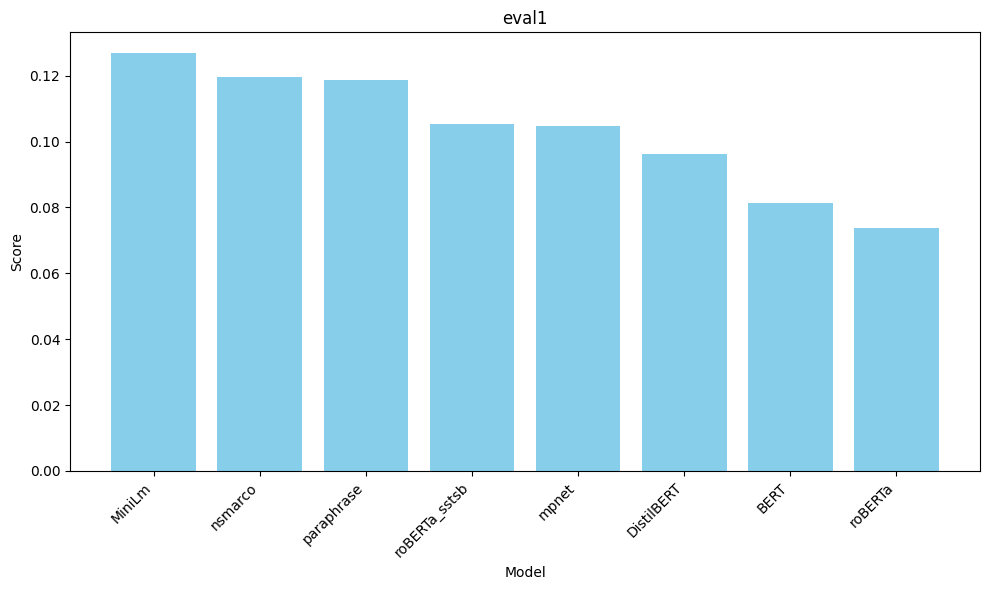

In [ ]:
import matplotlib.pyplot as plt

x_values = [item[0] for item in sorted_models]
y_values = [item[1] for item in sorted_models]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x_values, y_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('eval1')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#eval2
best_model_scores = {}

for model, model_name in zip(models, models_names):
    score = evaluate_model2(model, queries, new_expected_results)
    best_model_scores[model_name] = score

sorted_models = sorted(best_model_scores.items(), key=lambda x: x[1], reverse=True)

sorted_models


evaluating..
normalized scores: [0.16666666666666666, 0.0, 0.0, 0.16666666666666666, 0.16666666666666666, 0.0, 0.16666666666666666, 0.16666666666666666, 0.0, 0.0, 0.0, 0.0, 0.16666666666666666, 0.3333333333333333, 0.0, 0.16666666666666666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.0, 0.0, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.0, 0.16666666666666666, 0.3333333333333333, 0.0, 0.0, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.0, 0.0, 0.16666666666666666, 0.16666666666666666, 0.0, 0.16666666666666666, 0.0, 0.0, 0.16666666666666666, 0.16666666666666666, 0.0, 0.16666666666666666, 0.16666666666666666, 0.0, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.0, 0.0]
Scores for each query: [1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 

[('MiniLm', 0.16388888888888883),
 ('paraphrase', 0.16111111111111107),
 ('nsmarco', 0.14444444444444446),
 ('roBERTa_sstsb', 0.13611111111111115),
 ('mpnet', 0.1333333333333334),
 ('DistilBERT', 0.12222222222222229),
 ('BERT', 0.09722222222222225),
 ('roBERTa', 0.0861111111111111)]

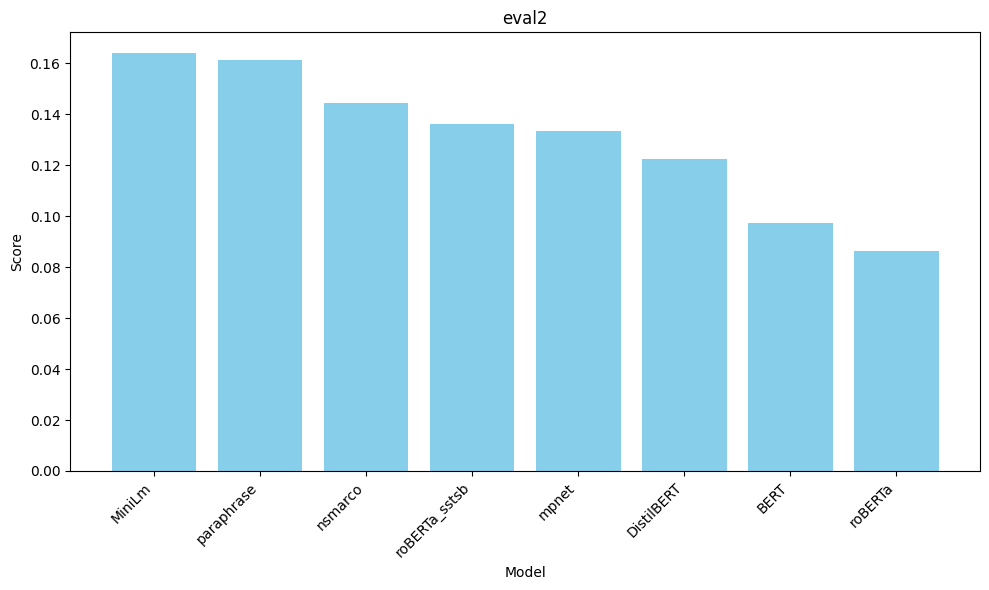

In [ ]:
x_values = [item[0] for item in sorted_models]
y_values = [item[1] for item in sorted_models]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x_values, y_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('eval2')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#eval3
best_model_scores = {}

for model, model_name in zip(models, models_names):
    score = evaluate_model3(model, queries, new_expected_results)
    best_model_scores[model_name] = score

sorted_models = sorted(best_model_scores.items(), key=lambda x: x[1], reverse=True)

sorted_models


evaluating..
normalized scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Scores for each query: [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
evaluating..
normalized scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Scores for each query: [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6

[('BERT', 1.0),
 ('roBERTa_sstsb', 1.0),
 ('DistilBERT', 1.0),
 ('roBERTa', 1.0),
 ('nsmarco', 1.0),
 ('MiniLm', 1.0),
 ('mpnet', 1.0),
 ('paraphrase', 1.0)]

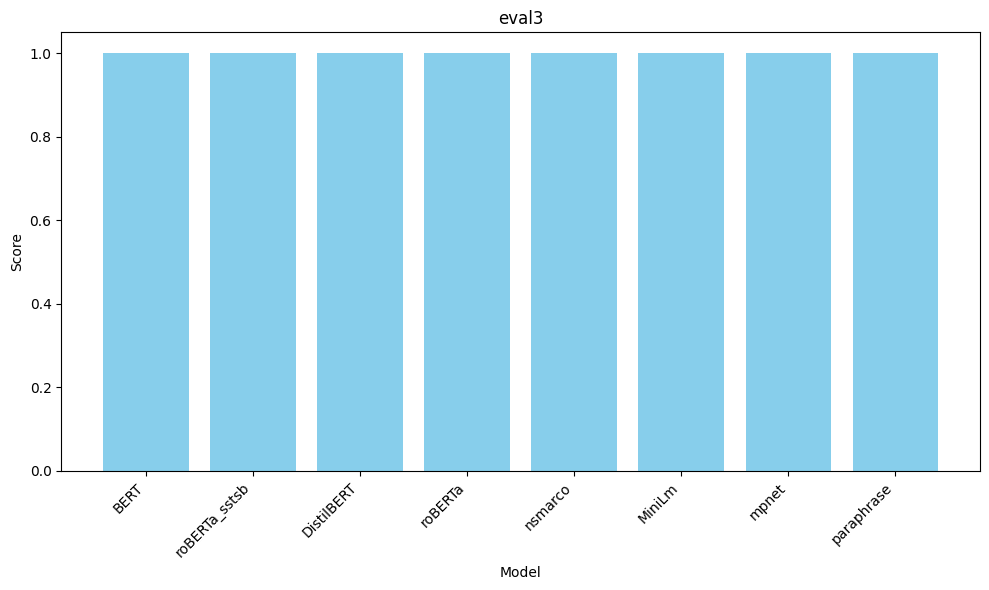

In [ ]:
x_values = [item[0] for item in sorted_models]
y_values = [item[1] for item in sorted_models]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x_values, y_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('eval3')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#eval4
best_model_scores = {}

for model, model_name in zip(models, models_names):
    score = evaluate_model4(model, queries, new_expected_results)
    best_model_scores[model_name] = score

sorted_models = sorted(best_model_scores.items(), key=lambda x: x[1], reverse=True)

sorted_models


evaluating..
normalized scores: [0.16666666666666666, 0.2222222222222222, 0.2254273504273504, 0.22730000960338037, 0.23206191436528512, 0.2343767291800999, 0.023809523809523808, 0.031746031746031744, 0.11507936507936507, 0.1173015873015873, 0.11943833943833942, 0.12188931983049628, 0.012820512820512822, 0.017871017871017872, 0.03638953638953639, 0.03830524520179693, 0.04017790437782689, 0.04221042470303014, 0.16666666666666666, 0.1724137931034483, 0.17460677555958862, 0.1772109422262553, 0.1789653281911676, 0.1814528903802223, 0.16666666666666666, 0.1818181818181818, 0.20033670033670034, 0.2836700336700337, 0.2861575958590884, 0.2893022499471387, 0.027777777777777776, 0.034188034188034185, 0.03675213675213675, 0.03869012124826078, 0.04072264157346404, 0.04310359395441641, 0.16666666666666666, 0.1697530864197531, 0.17315444696397078, 0.1754692617787856, 0.17718747483720484, 0.1810634438294529, 0.16666666666666666, 0.1686046511627907, 0.1720768733850129, 0.17435997840784398, 0.1760960895

[('paraphrase', 0.18648371155416865),
 ('MiniLm', 0.18478767743686736),
 ('mpnet', 0.17939772621866198),
 ('nsmarco', 0.17808880299978835),
 ('roBERTa_sstsb', 0.1689437734030329),
 ('DistilBERT', 0.15748340416056258),
 ('BERT', 0.12932842093195282),
 ('roBERTa', 0.11745982149999905)]

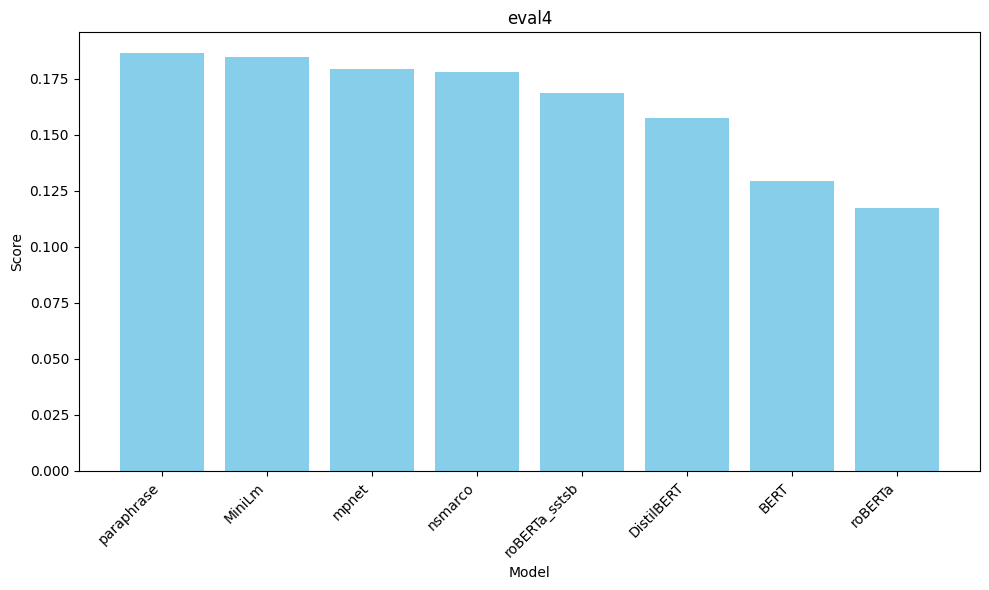

In [ ]:
x_values = [item[0] for item in sorted_models]
y_values = [item[1] for item in sorted_models]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x_values, y_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('eval4')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### calculating prec,recall and f1 only for the four best models


In [ ]:
precision, recall, f1_score, map_score, mrr_score = evaluate_semantic_search(queries, new_expected_results, model=MiniLm, data=data_plots, movie_data=movie_plots)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("MAP Score:", map_score)
print("MRR Score:", mrr_score)

Precision: 0.05940594059405945
Recall: 1.0
F1 Score: 0.11214953271028019
MAP Score: 0.05940594059405945
MRR Score: 0.9518650793650794


In [ ]:
precision, recall, f1_score, map_score, mrr_score = evaluate_semantic_search(queries, new_expected_results, model=paraphrase, data=data_plots, movie_data=movie_plots)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("MAP Score:", map_score)
print("MRR Score:", mrr_score)

Precision: 0.05940594059405945
Recall: 1.0
F1 Score: 0.11214953271028019
MAP Score: 0.05940594059405945
MRR Score: 0.9456349206349206


In [ ]:
precision, recall, f1_result, map_score, mrr_score = evaluate_semantic_search(queries, new_expected_results, model=nsmarco, data=data_plots, movie_data=movie_plots)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_result)
print("MAP Score:", map_score)
print("MRR Score:", mrr_score)


Precision: 0.05940594059405945
Recall: 1.0
F1 Score: 0.11214953271028019
MAP Score: 0.05940594059405945
MRR Score: 0.9289506172839507


In [ ]:
precision, recall, f1_score, map_score, mrr_score = evaluate_semantic_search(queries, new_expected_results, model=mpnet, data=data_plots, movie_data=movie_plots)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("MAP Score:", map_score)
print("MRR Score:", mrr_score)

Precision: 0.05940594059405945
Recall: 1.0
F1 Score: 0.11214953271028019
MAP Score: 0.05940594059405945
MRR Score: 0.8840579710144927


### This section if you want to test some queries manually to see the performance of each model but no need ###

In [ ]:
all_results = []
query = "vice president"

# Example usage with BERT
results = semantic_search(query,model=BERT)
all_results.extend(results)
print("Search results for query '{}' (BERT):".format(query))
for result in results:
    print("Movie ID:", result[0], "- Movie Plot:", result[1], "- Similarity Score:", result[2],)

# Example usage with roBERTa_sstsb
results = semantic_search(query, model=roBERTa_sstsb)
all_results.extend(results)
print("\nSearch results for query '{}' (roBERTa_sstsb):".format(query))
for result in results:
    print("Movie ID:", result[0], "- Movie Plot:", result[1], "- Similarity Score:", result[2])

# Example usage with DistilBERT
results = semantic_search(query, model=DistilBERT)
all_results.extend(results)
print("\nSearch results for query '{}' (DistilBERT):".format(query))
for result in results:
    print("Movie ID:", result[0], "- Movie Plot:", result[1], "- Similarity Score:", result[2])

# Example usage with roBERTa
results = semantic_search(query, model=roBERTa)
all_results.extend(results)
print("\nSearch results for query '{}' (roBERTa):".format(query))
for result in results:
    print("Movie ID:", result[0], "- Movie Plot:", result[1], "- Similarity Score:", result[2])

# Example usage with nsmarco
results = semantic_search(query, model=nsmarco)
all_results.extend(results)
print("\nSearch results for query '{}' (nsmarco):".format(query))
for result in results:
    print("Movie ID:", result[0], "- Movie Plot:", result[1], "- Similarity Score:", result[2])

# Example usage with MiniLm
results = semantic_search(query, model=MiniLm)
all_results.extend(results)
print("\nSearch results for query '{}' (MiniLm):".format(query))
for result in results:
    print("Movie ID:", result[0], "- Movie Plot:", result[1], "- Similarity Score:", result[2])

# Example usage with mpnet
results = semantic_search(query, model=mpnet)
all_results.extend(results)
print("\nSearch results for query '{}' (mpnet):".format(query))
for result in results:
    print("Movie ID:", result[0], "- Movie Plot:", result[1], "- Similarity Score:", result[2])


# Example usage with paraphrase
results = semantic_search(query, model=paraphrase)
all_results.extend(results)
print("\nSearch results for query '{}' (paraphrase):".format(query))
for result in results:
    print("Movie ID:", result[0], "- Movie Plot:", result[1], "- Similarity Score:", result[2])

Search results for query 'vice president' (BERT):
Movie ID: 26 - Movie Plot: The Lure of the Gown The story as told by Moving Picture World reads:
 - Similarity Score: 0.3407398
Movie ID: 29 - Movie Plot: Frankenstein Described as "a liberal adaptation of Mrs. Shelley's famous story", the plot description in the Edison Kinetogram was:[3] - Similarity Score: 0.2920103
Movie ID: 84 - Movie Plot: In the Land of the Head Hunters The following plot synopsis was published in conjunction with a 1915 showing of the film at Carnegie Hall: - Similarity Score: 0.2672878
Movie ID: 68 - Movie Plot: Captain Alvarez A melodrama about an American who becomes a revolutionary leader battling evil government spies in Argentina. William Desmond Taylor portrays the title role, and Denis Gage Deane-Tanner, Taylor's younger brother, is thought to have played the small role of a blacksmith. - Similarity Score: 0.21186677
Movie ID: 41 - Movie Plot: David Copperfield "David Copperfield consists of three reels a

### voting

In [ ]:
from collections import Counter, defaultdict

# Extract the counts of each movie ID at different positions
movie_counts = defaultdict(Counter)
for idx, movie_id in enumerate(result[0] for result in all_results):
    movie_counts[movie_id][idx] += 1

# Sort the movie IDs based on their counts at different positions
sorted_movie_ids = sorted(movie_plots.keys(), key=lambda x: [movie_counts[x][idx] for idx in range(len(all_results))], reverse=True)

# Print the sorted hard voting results
print("Sorted Hard Voting Results:")
for movie_id in sorted_movie_ids:
    counts_at_positions = [movie_counts[movie_id][idx] for idx in range(len(all_results))]
    plot = movie_plots.get(movie_id, "Unknown Plot")
    print(f"Movie ID: {movie_id} - - Movie Plot: {plot}")   ### Counts at Positions: {counts_at_positions}
